# Q-learning

A tiny grid world. Reaching the state (7, 3) provides a reward.

Date: 2018-03-19

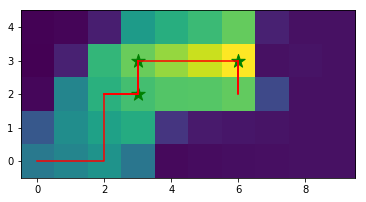

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Initialize estimates of the state-action value function, Q
Q = np.ones((10, 5, 4))

# The learning rate
alpha = 1e-2

# The number of steps
N = 10 ** 5

# The initial state
S = (0, 0)

# The probability of random exploration
eps = 0.1

# The discount rate
gamma = 0.95

# Record the last episode for the plot
state_trajectory = [S]
exploration_locations = []

for n in range(N):
    # Choose an action
    if np.random.rand() > eps:
        # Choose the best action found so far
        A = np.argmax(Q[S])
    else:
        # Try a random action
        exploration_locations.append(S)
        A = np.random.randint(4)

    # Update the state: 0 -> up, 1 -> down, 2 -> right, 3 -> left
    move_horizontal, flip = divmod(A, 2)
    diff = -1 if flip else 1
    S_new = (
        np.clip(S[0] + (diff if move_horizontal else 0), 0, 9),
        np.clip(S[1] + (0 if move_horizontal else diff), 0, 4))

    # get reward
    if S_new == (7, 3):
        R = 1
        S_new = (0, 0)
        last_state_trajectory = state_trajectory
        last_exploration_locations = exploration_locations
        state_trajectory = []
        exploration_locations = []
    else:
        R = 0

    # Update Q function
    target = R + gamma * Q[S_new[0], S_new[1]].max()
    Q[S[0], S[1], A] += alpha * (target - Q[S[0], S[1], A])
    state_trajectory.append(S_new)
    S = S_new

last_state_trajectory = np.array(last_state_trajectory)
last_exploration_locations = np.array(last_exploration_locations)

V = Q.max(axis=2)
plt.imshow(V.T, origin='lower')
plt.plot(last_state_trajectory[:, 0], last_state_trajectory[:, 1], color='red')
if len(last_exploration_locations):
    plt.scatter(
        last_exploration_locations[:, 0],
        last_exploration_locations[:, 1], marker='*', color='green', s=200)